#Title: Laptop Price Prediction using Machine Learning

**1. Problem Statement**

Predict the price of laptops based on various features such as brand, processor, RAM, storage, screen size, and operating system. This can help consumers make informed decisions and vendors adjust pricing strategies.

**2. Outline of the Project (Steps)**

Load and inspect data

Clean and preprocess data

Feature engineering (optional)

Encoding categorical variables

Split data into training/testing

Train models

Predict and evaluate

Fine-tune using hyperparameters

Compare results and conclude

**3. Feature Scaling (Optional)**

Apply StandardScaler or MinMaxScaler to normalize continuous variables like:

Inches

Weight

Ram

Price_euros (target variable; only during analysis, not during training)



**4.Encoding**
Convert categorical columns like

Company

TypeName

OpSys

Cpu

Gpu
Using:

Label Encoding (if ordinal)

One Hot Encoding (if nominal)



5.**Model Preparation**

Split data into features and target

Train/Test Split using train_test_split()

Train models: Linear Regression, Random Forest,XBGregressor etc.

**6. Model Prediction**

Use .predict() to get predictions on test data.



**7. Model Evaluation Metrics**
Use:

MAE (Mean Absolute Error)

MSE (Mean Squared Error)

RMSE (Root Mean Squared Error)

R² Score (Accuracy)

**8. Hyperparameter Tuning**
Use:

GridSearchCV / RandomizedSearchCV
To tune models like  Random Forest



**9. Conclusion**
Describe how the model performed

Compare different algorithms

Choose the best-fit model based on metrics

Interpret model behavior

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/DataSets/laptop_price.csv",encoding='latin-1')
df1

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


#Copy a data

In [ ]:
df = df1.copy()
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df.size

16939

In [ ]:
df.shape

(1303, 13)

In [ ]:
#Basic Info and Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
#Summary Statistics
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [ ]:
#Checking for missing values
df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [ ]:
#4. Data Types and Conversion
#Check if Ram, Weight columns are strings (like "8GB", "1.37kg"). We will convert them.
# Convert 'Ram' and 'Weight' to numeric
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [ ]:
#Unique Values in Categorical Columns
for col in ['Company', 'TypeName', 'OpSys', 'Cpu', 'Gpu']:
    print(f"{col} --> {df[col].nunique()} unique values")

Company --> 19 unique values
TypeName --> 6 unique values
OpSys --> 9 unique values
Cpu --> 118 unique values
Gpu --> 110 unique values


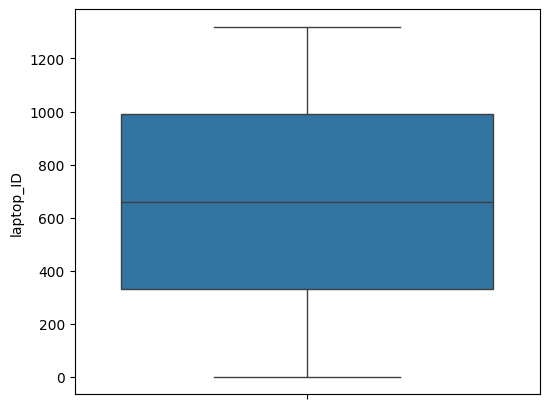

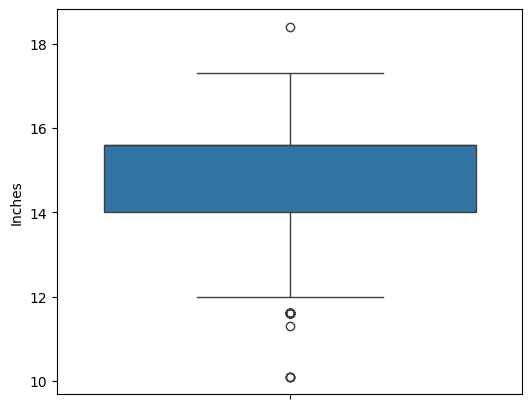

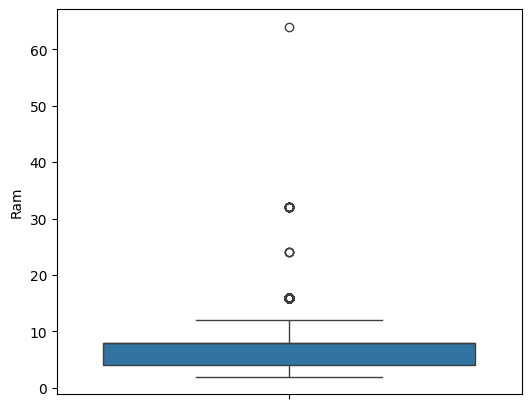

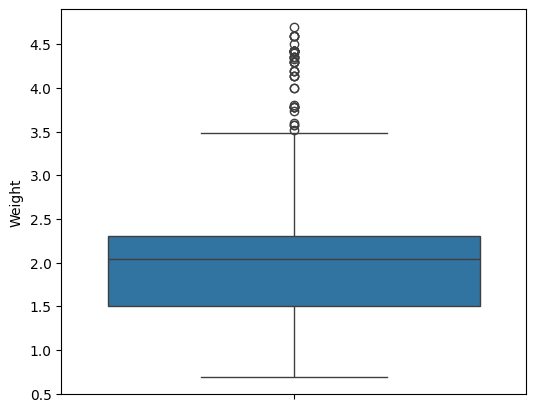

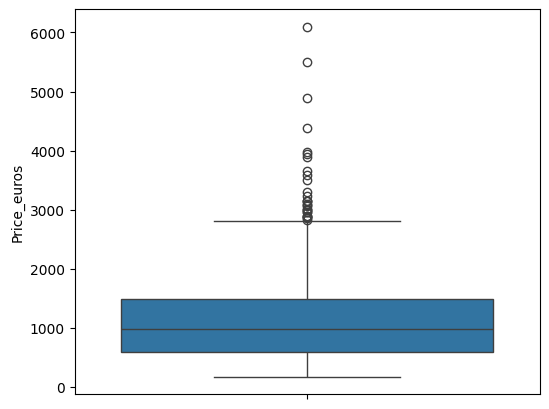

In [ ]:
for column in df.select_dtypes(include=["number"]).columns:
  plt.figure(figsize=(6,5))
  sns.boxplot(y=df[column])

In [ ]:
cols=[ 'Ram','Weight','Inches']

numeric_cols=df.select_dtypes(include='number').columns

for cols in df.select_dtypes(include='number').columns:
  q1=df[cols].quantile(0.25)
  q3=df[cols].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.15*iqr
  upper_bound=q3+1.15*iqr
  df[cols] = df[cols].clip(lower=lower_bound, upper=upper_bound)

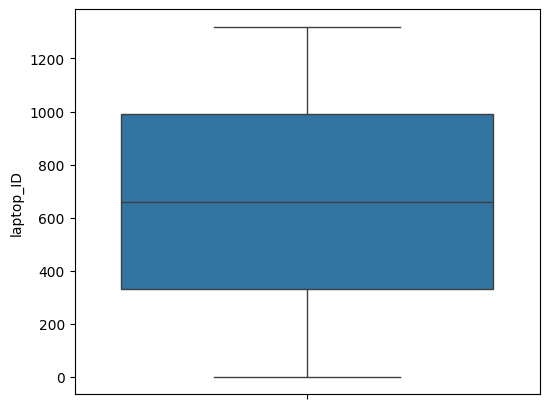

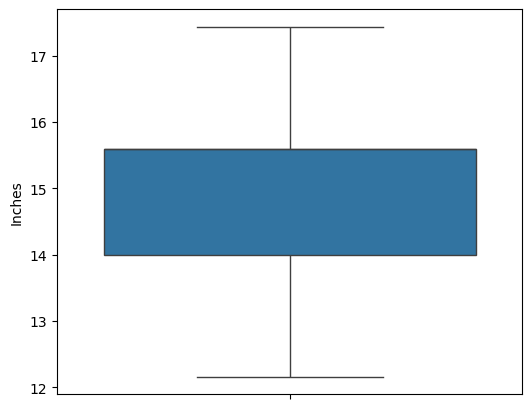

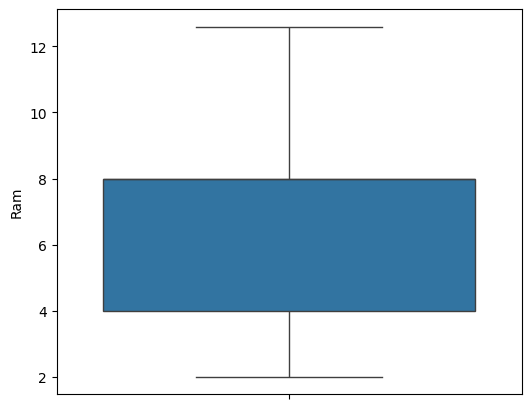

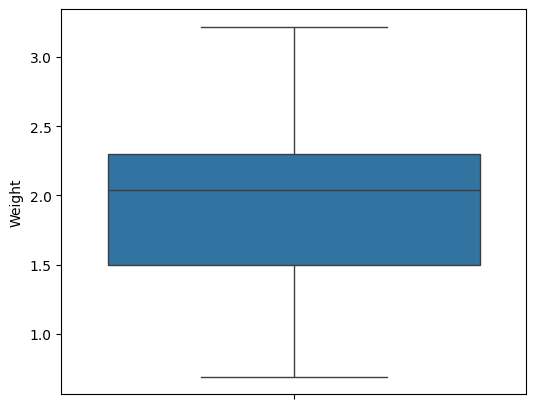

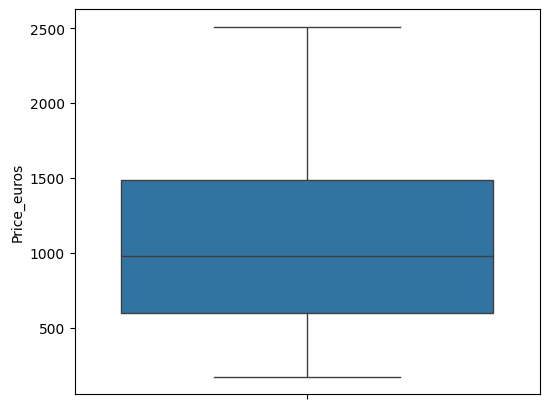

In [ ]:
for column in df.select_dtypes(include=["number"]).columns:
  plt.figure(figsize=(6,5))
  sns.boxplot(y=df[column])

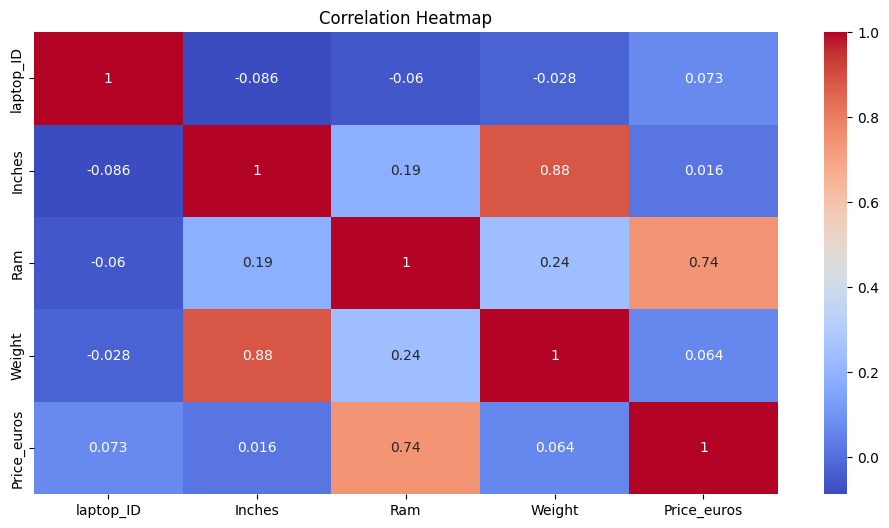

In [ ]:
#Correlation Heatmap
#Shows which features are correlated with Price_euros.
plt.figure(figsize=(12, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

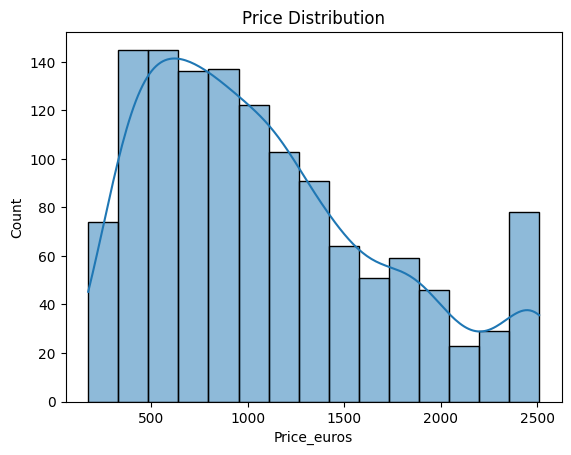

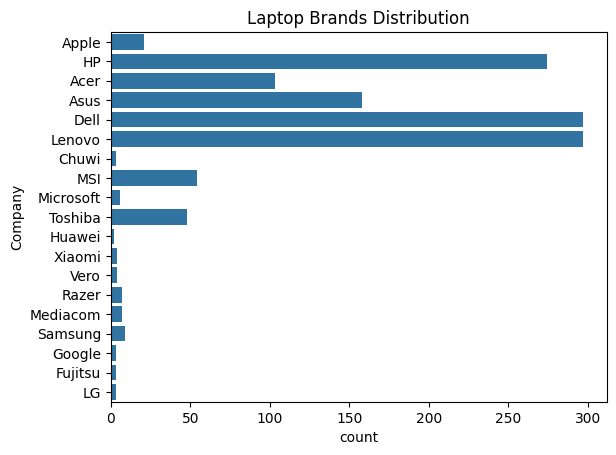

In [ ]:
#Visualizing Distributions
#Check the distribution of the target variable and features:
# Target variable
sns.histplot(df['Price_euros'], kde=True)
plt.title("Price Distribution")
plt.show()

# Company count
sns.countplot(y='Company', data=df)
plt.title("Laptop Brands Distribution")
plt.show()

#Feature Engineering

In [ ]:
import re
#Extact CPU Brand
def get_cpu_type(cpu):
    cpu = cpu.lower()
    if 'intel' in cpu:
        if 'i3' in cpu:
            return 'Intel i3'
        elif 'i5' in cpu:
            return 'Intel i5'
        elif 'i7' in cpu:
            return 'Intel i7'
        elif 'i9' in cpu:
            return 'Intel i9'
        elif 'pentium' in cpu:
            return 'Intel Pentium'
        elif 'celeron' in cpu:
            return 'Intel Celeron'
        elif 'atom' in cpu:
            return 'Intel Atom'
        else:
            return 'Intel Other'
    elif 'amd' in cpu:
        if 'ryzen 3' in cpu:
            return 'AMD Ryzen 3'
        elif 'ryzen 5' in cpu:
            return 'AMD Ryzen 5'
        elif 'ryzen 7' in cpu:
            return 'AMD Ryzen 7'
        elif 'a9' in cpu:
            return 'AMD A9'
        elif 'a10' in cpu:
            return 'AMD A10'
        elif 'e2' in cpu:
            return 'AMD E2'
        else:
            return 'AMD Other'
    else:
        return 'Other'
df['Cpu_Brand'] = df['Cpu'].apply(get_cpu_type)
def extract_cpu_speed(cpu_str):
    match = re.search(r"(\d+(\.\d+)?)\s*GHz", cpu_str)
    return float(match.group(1)) if match else None

df['Cpu_Speed_GHz'] = df['Cpu'].apply(extract_cpu_speed)

#---Splits the 'Cpu' string and takes the first word (e.g., “Intel Core i5” → “Intel”).Creates a new column: Cpu_Brand.
#Identify Touchscreen laptop
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
#---Checks if 'Touchscreen' appears in the 'ScreenResolution' text. If yes, assigns 1; else 0.
#Identify IPS Display
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
#---Same as above, but for detecting whether the display is IPS technology.
#Extract Screen resolution
def extract_resolution(s): match = re.search(r'(\d+)x(\d+)', s); return (int(match.group(1)), int(match.group(2))) if match else (0, 0)
df['Resolution'] = df['ScreenResolution'].apply(extract_resolution)
df['X_res'] = df['Resolution'].apply(lambda x: x[0])
df['Y_res'] = df['Resolution'].apply(lambda x: x[1])
#--Uses regular expressions to extract numbers like “1920x1080”.Splits them into X and Y resolution columns
#calculate ppi
df['PPI'] = ((df['X_res']**2 + df['Y_res']**2)**0.5 / df['Inches']).round(2)
#--Uses the Pythagorean Theorem to compute screen pixel density:√(X² + Y²) / Screen Inches.Higher PPI = sharper display
#extract Gpu brand
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])
#--Same idea as CPU: extracts the first word from GPU string (e.g., "Nvidia GeForce" → "Nvidia").
#split memory into types
def split_memory(mem):
    mem = mem.replace('GB', '').replace('TB', '000').split('+')
    total = {'HDD': 0, 'SSD': 0, 'Flash': 0, 'Hybrid': 0}
    for part in mem:
        if 'HDD' in part: total['HDD'] += int(re.findall(r'\d+', part)[0])
        elif 'SSD' in part: total['SSD'] += int(re.findall(r'\d+', part)[0])
        elif 'Flash' in part: total['Flash'] += int(re.findall(r'\d+', part)[0])
        elif 'Hybrid' in part: total['Hybrid'] += int(re.findall(r'\d+', part)[0])
    return pd.Series(total)
df[['HDD', 'SSD', 'Flash', 'Hybrid']] = df['Memory'].apply(split_memory)
#--Breaks complex entries like “256GB SSD + 1TB HDD” into:.HDD = 1000,SSD = 256,Flash & Hybrid = 0 if not present.This helps the model learn from exact memory type capacities.
#Drop unnecessary columns
#---Removes columns that:Aren’t useful for modeling (like laptop_ID),Have already been processed into new useful columns (like ScreenResolution → X_res, Y_res, PPI),Creates a clean DataFrame df_fe with only the needed features.
df_fe = df.drop(columns=['laptop_ID', 'Product', 'ScreenResolution', 'Cpu', 'Gpu', 'Memory', 'Resolution'])
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,IPS,Resolution,X_res,Y_res,PPI,Gpu_Brand,HDD,SSD,Flash,Hybrid
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,...,1,"(2560, 1600)",2560,1600,226.98,Intel,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,...,0,"(1440, 900)",1440,900,127.68,Intel,0,0,128,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,...,0,"(1920, 1080)",1920,1080,141.21,Intel,0,256,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,12.6,512GB SSD,AMD Radeon Pro 455,...,1,"(2880, 1800)",2880,1800,220.53,AMD,0,512,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,...,1,"(2560, 1600)",2560,1600,226.98,Intel,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,...,1,"(1920, 1080)",1920,1080,157.35,Intel,0,128,0,0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,12.6,512GB SSD,Intel HD Graphics 520,...,1,"(3200, 1800)",3200,1800,276.05,Intel,0,512,0,0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,...,0,"(1366, 768)",1366,768,111.94,Intel,0,0,64,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,...,0,"(1366, 768)",1366,768,100.45,AMD,1000,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Inches                   1303 non-null   float64
 1   ScreenResolution         1303 non-null   object 
 2   Cpu                      1303 non-null   object 
 3   Ram                      1303 non-null   float64
 4   Memory                   1303 non-null   object 
 5   Gpu                      1303 non-null   object 
 6   Weight                   1303 non-null   float64
 7   Price_euros              1303 non-null   float64
 8   Cpu_Speed_GHz            1303 non-null   float64
 9   Touchscreen              1303 non-null   int64  
 10  IPS                      1303 non-null   int64  
 11  Resolution               1303 non-null   object 
 12  X_res                    1303 non-null   float64
 13  Y_res                    1303 non-null   float64
 14  PPI                     

#Encoding


In [ ]:
# Apply One-Hot Encoding
categorical_columns = ['Company', 'TypeName', 'OpSys', 'Cpu_Brand', 'Gpu_Brand'
]
df_encoded = pd.get_dummies(df_fe, columns=categorical_columns, drop_first=True)

# Check the result
print(df_encoded.shape)
df_encoded.head()

(1303, 59)


,Inches,Ram,Weight,Price_euros,Cpu_Speed_GHz,Touchscreen,IPS,X_res,Y_res,PPI,...,Cpu_Brand_Intel Celeron,Cpu_Brand_Intel Other,Cpu_Brand_Intel Pentium,Cpu_Brand_Intel i3,Cpu_Brand_Intel i5,Cpu_Brand_Intel i7,Cpu_Brand_Other,Gpu_Brand_ARM,Gpu_Brand_Intel,Gpu_Brand_Nvidia
0,13.3,8.0,1.37,1339.690,2.3,0,1,2560,1600,226.98,...,False,False,False,False,True,False,False,False,True,False
1,13.3,8.0,1.34,898.940,1.8,0,0,1440,900,127.68,...,False,False,False,False,True,False,False,False,True,False
2,15.6,8.0,1.86,575.000,2.5,0,0,1920,1080,141.21,...,False,False,False,False,True,False,False,False,True,False
3,15.4,12.6,1.83,2510.092,2.7,0,1,2880,1800,220.53,...,False,False,False,False,False,True,False,False,False,False
4,13.3,8.0,1.37,1803.600,3.1,0,1,2560,1600,226.98,...,False,False,False,False,True,False,False,False,True,False


#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features = ['Inches', 'Ram', 'Weight', 'X_res', 'Y_res', 'PPI', 'HDD', 'SSD', 'Flash', 'Hybrid']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling on a copy of the dataframe
df_scaled = df_encoded.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Now df_scaled is your scaled dataset ready for training
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,IPS,Resolution,X_res,Y_res,PPI,Gpu_Brand,HDD,SSD,Flash,Hybrid
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,...,1,"(2560, 1600)",2560,1600,226.98,Intel,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,...,0,"(1440, 900)",1440,900,127.68,Intel,0,0,128,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,...,0,"(1920, 1080)",1920,1080,141.21,Intel,0,256,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,12.6,512GB SSD,AMD Radeon Pro 455,...,1,"(2880, 1800)",2880,1800,220.53,AMD,0,512,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,...,1,"(2560, 1600)",2560,1600,226.98,Intel,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,...,1,"(1920, 1080)",1920,1080,157.35,Intel,0,128,0,0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,12.6,512GB SSD,Intel HD Graphics 520,...,1,"(3200, 1800)",3200,1800,276.05,Intel,0,512,0,0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,...,0,"(1366, 768)",1366,768,111.94,Intel,0,0,64,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,...,0,"(1366, 768)",1366,768,100.45,AMD,1000,0,0,0


<Axes: xlabel='Price_euros', ylabel='Count'>

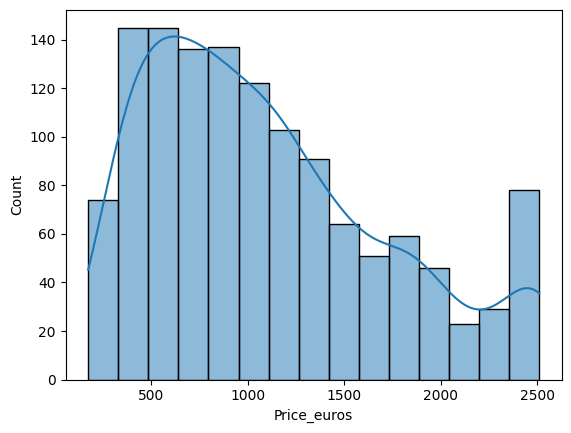

In [ ]:
sns.histplot(df['Price_euros'], kde=True)

In [ ]:
df['Price_euros'] = np.log(df['Price_euros'])

In [ ]:
df = pd.get_dummies(df, columns=['Company', 'TypeName', 'OpSys', 'Cpu_Brand', 'Gpu_Brand'], drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['Ram', 'Weight', 'Inches', 'X_res', 'Y_res', 'PPI', 'HDD', 'SSD', 'Flash', 'Hybrid']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:

# The columns 'ScreenResolution', 'Memory', 'Cpu', 'Gpu', and 'Resolution' were dropped in a previous step.
# I will remove them from the list of columns to drop.
df = df.drop(columns=['laptop_ID', 'Product'])
df

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros,Cpu_Speed_GHz,Touchscreen,...,Cpu_Brand_Intel Celeron,Cpu_Brand_Intel Other,Cpu_Brand_Intel Pentium,Cpu_Brand_Intel i3,Cpu_Brand_Intel i5,Cpu_Brand_Intel i7,Cpu_Brand_Other,Gpu_Brand_ARM,Gpu_Brand_Intel,Gpu_Brand_Nvidia
0,-1.267410,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,0.152622,128GB SSD,Intel Iris Plus Graphics 640,-1.122418,7.200194,2.3,0,...,False,False,False,False,True,False,False,False,True,False
1,-1.267410,1440x900,Intel Core i5 1.8GHz,0.152622,128GB Flash Storage,Intel HD Graphics 6000,-1.175660,6.801216,1.8,0,...,False,False,False,False,True,False,False,False,True,False
2,0.409485,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,0.152622,256GB SSD,Intel HD Graphics 620,-0.252795,6.354370,2.5,0,...,False,False,False,False,True,False,False,False,True,False
3,0.263668,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,1.683903,512GB SSD,AMD Radeon Pro 455,-0.306037,7.828075,2.7,0,...,False,False,False,False,False,True,False,False,False,False
4,-1.267410,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,0.152622,256GB SSD,Intel Iris Plus Graphics 650,-1.122418,7.497540,3.1,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,-0.757051,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,-1.178926,128GB SSD,Intel HD Graphics 520,-0.359279,6.458338,2.5,1,...,False,False,False,False,False,True,False,False,True,False
1299,-1.267410,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,1.683903,512GB SSD,Intel HD Graphics 520,-1.246650,7.312553,2.5,1,...,False,False,False,False,False,True,False,False,True,False
1300,-0.757051,1366x768,Intel Celeron Dual Core N3050 1.6GHz,-1.844700,64GB Flash Storage,Intel HD Graphics,-0.891702,5.433722,1.6,0,...,True,False,False,False,False,False,False,False,True,False
1301,0.409485,1366x768,Intel Core i7 6500U 2.5GHz,-0.513152,1TB HDD,AMD Radeon R5 M330,0.332869,6.638568,2.5,0,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df_encoded.drop('Price_euros', axis=1)
y = df_encoded['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2 * 100, 2), "%")

MAE: 218.86
MSE: 79970.77
RMSE: 282.79
R² Score: 76.31 %


#RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#create a model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=40)
#train the model
rf_model.fit(X_train, y_train)
#make predications
y_pred_rf = rf_model.predict(X_test)
#Evalute the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

Random Forest Evaluation:
MAE: 158.72195830011032
MSE: 50590.321899516544
RMSE: 224.92292435302485
R² Score: 0.8501159017118287


#RFR Hyperparamters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2,scoring='r2')

# Fit to training data
grid_search.fit(X_train, y_train)

# Best model
print("✅ Best Parameters:", grid_search.best_params_)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
✅ Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Evaluation:
MAE: 158.72195830011032
MSE: 50590.321899516544
RMSE: 224.92292435302485
R² Score: 0.8501159017118287


#XGBRegressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Clean up column names for XGBoost
X_train.columns = X_train.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')
X_test.columns = X_test.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')


xgb = XGBRegressor(n_estimators=300,learning_rate=0.2,max_depth=4,random_state=42)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

XGBoost Evaluation:
MAE: 149.08648934620825
MSE: 48555.79759137846
RMSE: 220.35380094606597
R² Score: 0.856143592976105


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, max_depth=4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train_score = r2_score(y_train, model.predict(X_train))

print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2 * 100, 2), "%")
print("Train R² Score:", round(train_score * 100, 2), "%")

MAE: 141.85
MSE: 42507.39
RMSE: 206.17
R² Score: 87.41 %
Train R² Score: 98.46 %


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Use smaller learning rate and more estimators to reduce overfitting
model = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=2,
    subsample=0.9,
    max_features='sqrt',
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train_score = r2_score(y_train, model.predict(X_train))

# Print scores
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("Test R² Score:", round(r2 * 100, 2), "%")
print("Train R² Score:", round(train_score * 100, 2), "%")


MAE: 154.94
MSE: 45955.08
RMSE: 214.37
Test R² Score: 86.38 %
Train R² Score: 89.93 %


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

# Perform 5-fold cross-validation on your model
scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # R² Score

print("Cross-validation scores (R²):", scores)
print("Average R² Score:", round(scores.mean() * 100, 2), "%")


Cross-validation scores (R²): [0.8154445  0.84757842 0.86105803 0.74415261 0.78874832]
Average R² Score: 81.14 %


In [ ]:

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = XGBRegressor(
    n_estimators=5000,
    learning_rate=0.01,
    max_depth=15,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=1.5,
    random_state=40,
    n_jobs=-1,
    max_features= 8,
    min_samples_split= 8
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train_score = r2_score(y_train, model.predict(X_train))

# Print results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("Test R² Score:", round(r2 * 100, 2), "%")
print("Train R² Score:", round(train_score * 100, 2), "%")


MAE: 151.18
MSE: 47958.05
RMSE: 218.99
Test R² Score: 85.79 %
Train R² Score: 99.73 %
